<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://www.sejuku.net/blog/67863

In [1]:
import gensim
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

In [2]:
print("Loading dataset...")
twenty_news = datasets.fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))

Loading dataset...


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
docs = twenty_news.data
sw = set(stopwords.words())
texts = [
    [w for w in doc.lower().split() if w not in sw]
        for doc in docs
]

In [5]:
count = Counter(w for doc in texts for w in doc)
count.most_common()[:10]

[('-', 6200),
 ('would', 6074),
 ('x', 4688),
 (':', 3649),
 ('like', 3624),
 ('get', 3447),
 ('people', 3387),
 ("max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'", 3289),
 ('--', 3241),
 ('1', 3006)]

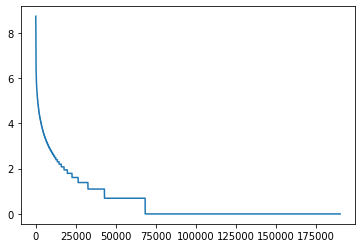

In [6]:
y = [i[1] for i in count.most_common()]
plt.plot(np.log(y))
plt.show()

In [7]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [8]:
num_tokens = len(count.most_common())
N = int(num_tokens*0.05)
max_frequency = count.most_common()[N][1]
 
corpus = [[w for w in doc if max_frequency > w[1] >= 3] for doc in corpus]

In [9]:
num_topics = 20
 
lda = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary
)

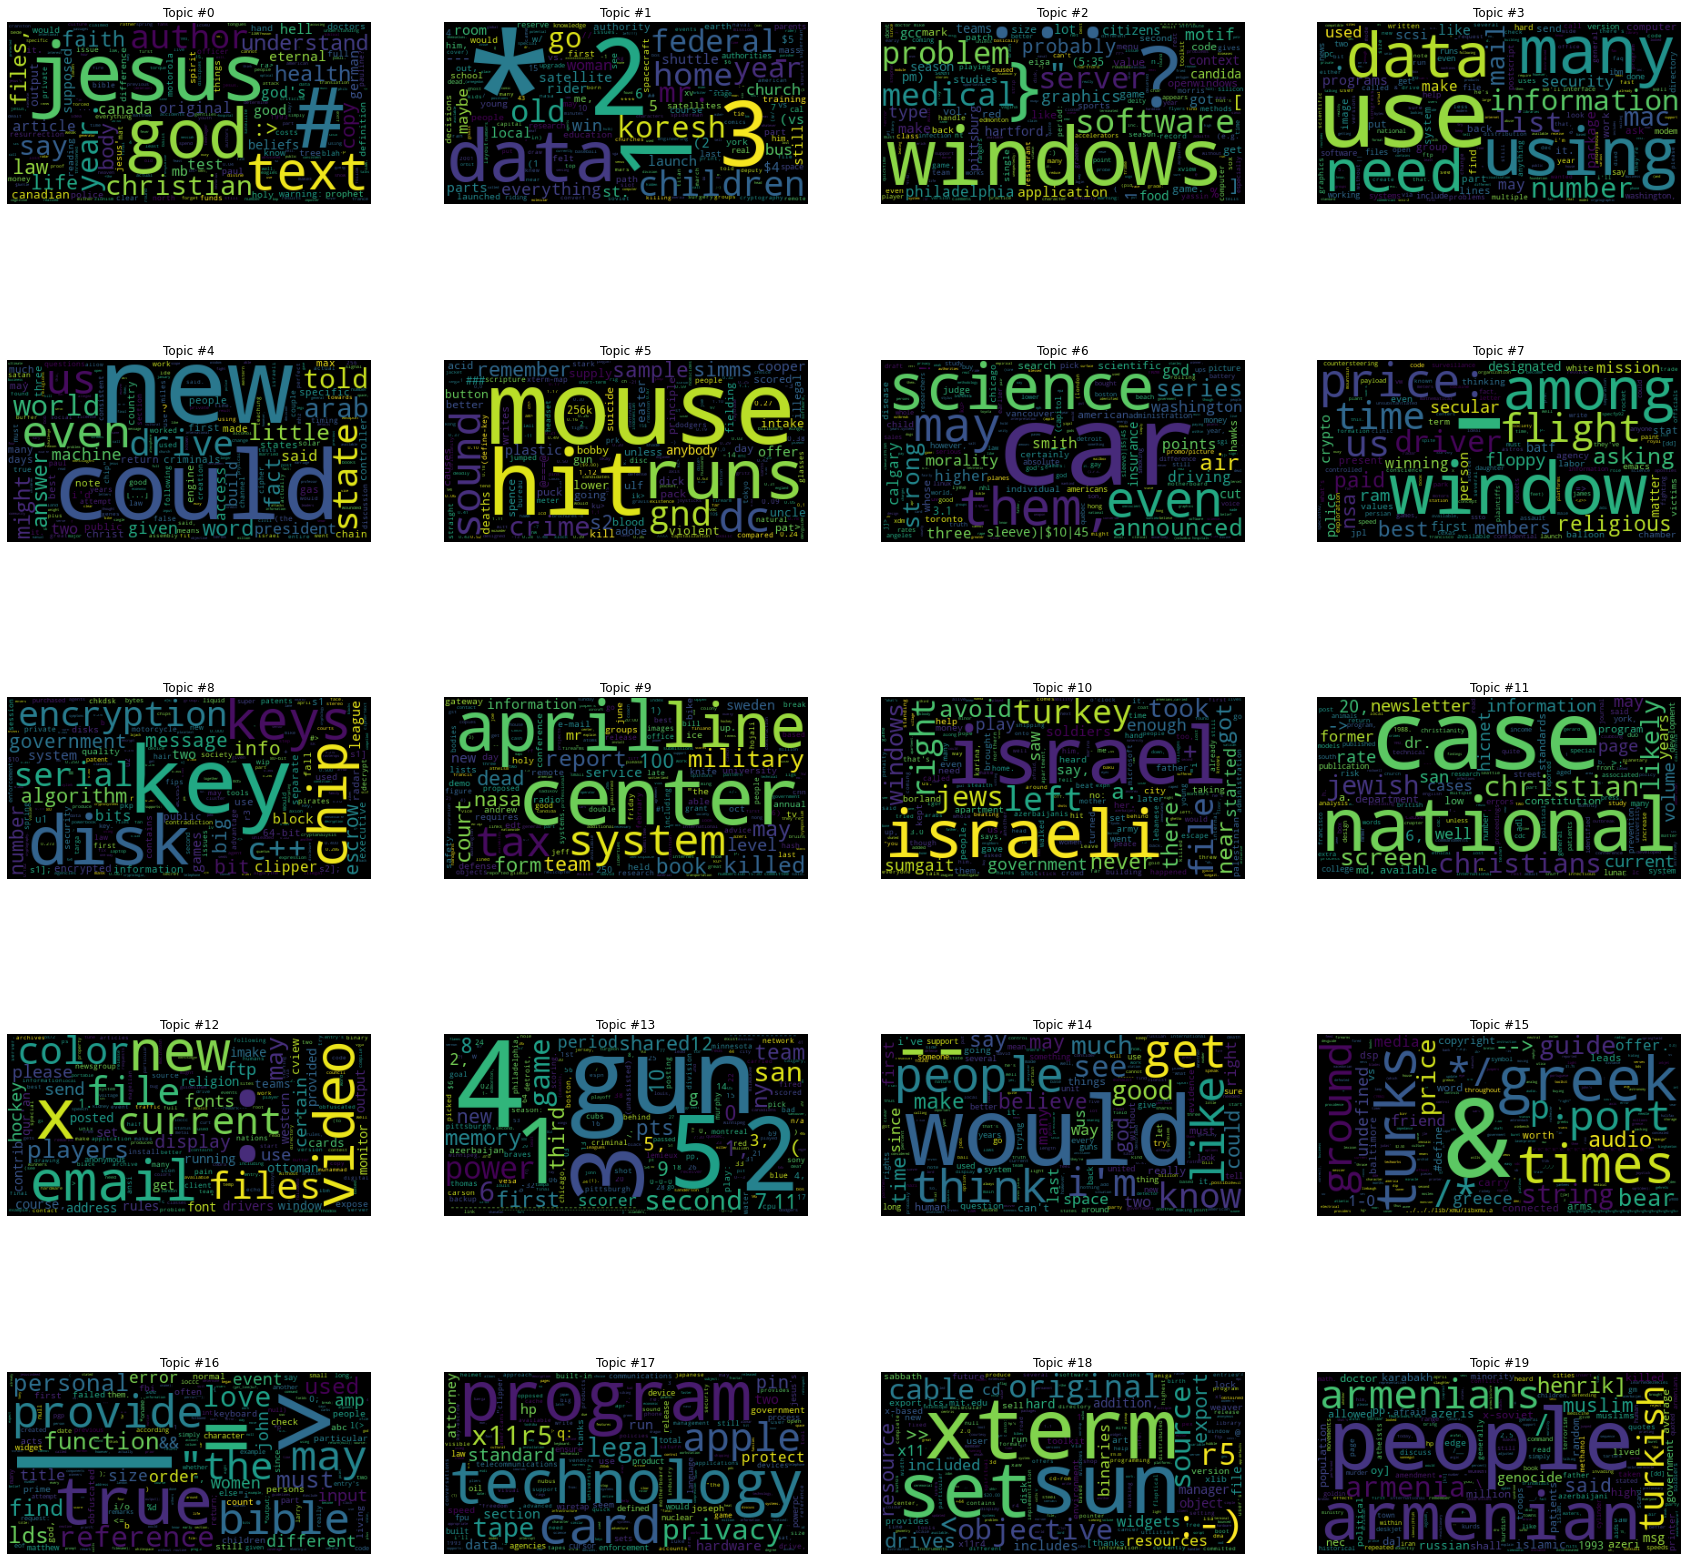

In [10]:
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = WordCloud().generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))
    
plt.show()